In [1]:
import astropy.io
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as col
import math
import pandas as pd
import time

from astropy.io import fits
from scipy.ndimage import gaussian_filter1d
from scipy.signal import argrelextrema
from math import pi

In [2]:
def ring(data, pixel_size, center_x, center_y, delta):

    r_vals = np.zeros(data.shape)

    r_dict = {}
    tic = time.perf_counter()
    y_len = len(data)
    x_len = len(data[1])
    y_skip_lst = []
    print("Delta: {}".format(delta))
    
    #delta = round(center_x/35) + 1
    #print(delta)
    
    print(len(data))
    
    for r in range(0, len(data), delta):
        I_sum = 0
        pix_count = 0
        
        for y in range(y_len):
            dead_row = True
            
            if y not in y_skip_lst:
                
                
                for x in range(x_len):
                

                    I = data[y, x]

                    if dead_row is True and I > 0:
                        dead_row = False

                    rx = abs(center_x - x)
                    ry = abs(center_y - y)

                    if (rx**2 + ry**2) <= r**2 and r_vals[y, x] == 0:
                        r_vals[y, x] = r
                        I_sum += I
                        pix_count += 1
                        
            if dead_row is True:
                y_skip_lst.append(y)
        

        if I_sum != 0:
            r_dict[r] = I_sum / pix_count
        else:
            break

    
    r_lst = []
    cul_vals = []
    I_vals = []
    moving_sum = 0
    
    for key in r_dict:
        
        r_cm = pixel_size * key
        r_kpc = round((r_cm * 3.24077928967e-19) / 1e3, 4)
        
        r_lst.append(r_kpc)
        moving_sum += r_dict[key]
        cul_vals.append(moving_sum)
        I_vals.append(r_dict[key])
    
        
    max_val = cul_vals[-1]
    norm_cul_vals = []
    for element in cul_vals:
        norm = element / max_val
        norm_cul_vals.append(norm)
        
        
        
        
    plt.plot(r_lst, I_vals)
    plt.title("Jet Intensities Radially")
    plt.xlabel("R-Value (kpc)")
    plt.ylabel("Intensity Value")
    plt.show()
    
    plt.bar(r_lst, norm_cul_vals, width=0.5)
    plt.plot(r_lst, norm_cul_vals)
    plt.title("Normalized Cumulative Histogram of Jet Intensities Radially")
    plt.xlabel("R-Value (kpc)")
    plt.ylabel("Normalized Cumulative Value")
    plt.show()
    
    # 1. Create an array with outliers
    # 2. Determine mean and standard deviation
    mean = np.mean(I_vals)
    std_dev = np.std(I_vals)
    # 3. Normalize array around 0
    zero_based = abs(I_vals - mean)
    # 4. Define maximum number of standard deviations
    max_deviations = 1.75
    # 5. Access only non-outliers using Boolean Indexing
    no_outliers = []
    
    for i, element in enumerate(zero_based):
        if element < max_deviations * std_dev:
            no_outliers.append(I_vals[i])
        else:
            no_outliers.append(0)
    
    plt.plot(r_lst, no_outliers)
    plt.title("Jet Intensities Radially")
    plt.xlabel("R-Value (kpc)")
    plt.ylabel("Intensity Value")
    plt.show()
    
    pixel_count = 0
    for element in norm_cul_vals:
        if element >= 0.02 and element <= 0.98:
            pixel_count += delta
            
    jet_r_cm = pixel_size * pixel_count
    jet_r_kpc = round((jet_r_cm * 3.24077928967e-19) / 1e3, 4)
    print("\nTotal Radius (96%): {} kpc".format(jet_r_kpc))
    
    toc = time.perf_counter()
    print("\nCompleted in {} seconds".format(round(toc - tic)))
    


        
        
                    
                    
    
        
    


JET RING DETERMINING PROGRAM:
____________________________________________________________________________________________________

File Number 1/11

File Name: Jet Simulation Data/Group_L446_rc3_beta07/nu=30.0MHz/Group_L446_rc3_beta07_0010_nu=30.0_los=0.00_0.00_1.00_1.0Myr.fits.gz
Simulation Title: Simulation Group_L446_rc3_beta07 - 1.0 Myr - 30 MHz
Time index: 1.0002e+00 Myr
Pixel size: 1.2500e+21 cm
Center of fits image: (8, 8)
FITS Image Dimensions: 16x16 pixels 



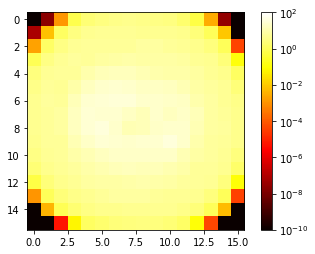

Delta: 1
16


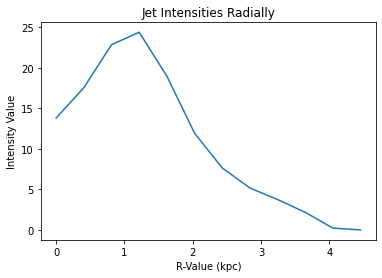

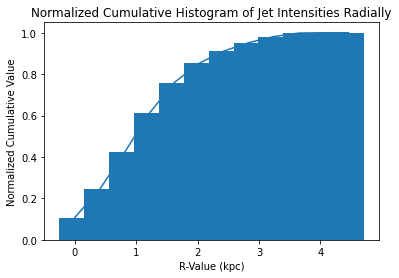

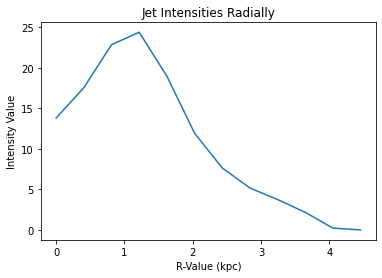


Total Radius (96%): 3.2408 kpc

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 2/11

File Name: Jet Simulation Data/Group_L446_rc3_beta07/nu=30.0MHz/Group_L446_rc3_beta07_0020_nu=30.0_los=0.00_0.00_1.00_2.0Myr.fits.gz
Simulation Title: Simulation Group_L446_rc3_beta07 - 2.0 Myr - 30 MHz
Time index: 2.0002e+00 Myr
Pixel size: 1.2500e+21 cm
Center of fits image: (24, 24)
FITS Image Dimensions: 48x48 pixels 



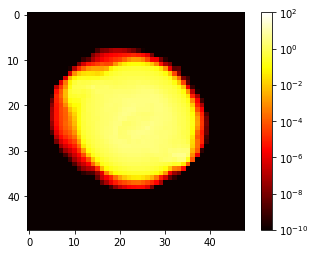

Delta: 2
48


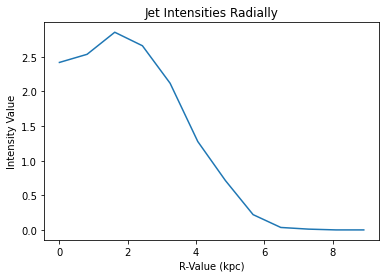

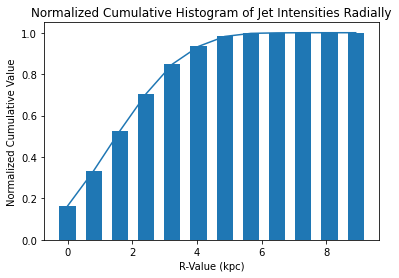

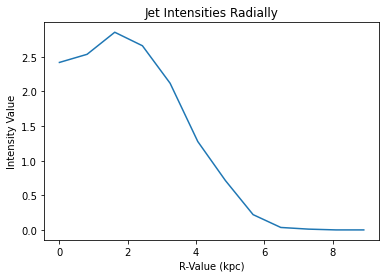


Total Radius (96%): 4.8612 kpc

Completed in 0 seconds
____________________________________________________________________________________________________

File Number 3/11

File Name: Jet Simulation Data/Group_L446_rc3_beta07/nu=30.0MHz/Group_L446_rc3_beta07_0040_nu=30.0_los=0.00_0.00_1.00_4.0Myr.fits.gz
Simulation Title: Simulation Group_L446_rc3_beta07 - 4.0 Myr - 30 MHz
Time index: 4.0001e+00 Myr
Pixel size: 1.2500e+21 cm
Center of fits image: (88, 88)
FITS Image Dimensions: 176x176 pixels 



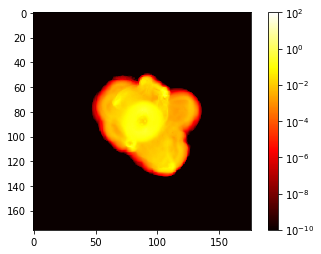

Delta: 3
176


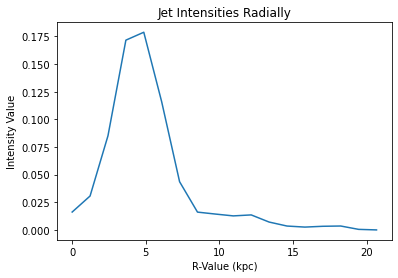

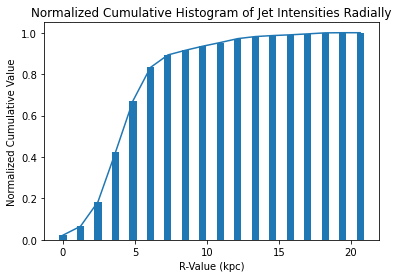

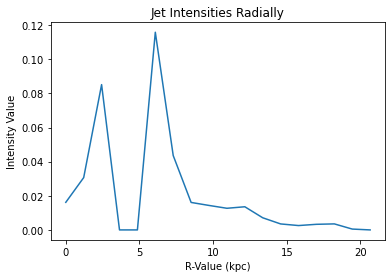


Total Radius (96%): 13.3682 kpc

Completed in 1 seconds
____________________________________________________________________________________________________

File Number 4/11

File Name: Jet Simulation Data/Group_L446_rc3_beta07/nu=30.0MHz/Group_L446_rc3_beta07_0080_nu=30.0_los=0.00_0.00_1.00_8.0Myr.fits.gz
Simulation Title: Simulation Group_L446_rc3_beta07 - 8.0 Myr - 30 MHz
Time index: 8.0001e+00 Myr
Pixel size: 1.2500e+21 cm
Center of fits image: (216, 216)
FITS Image Dimensions: 432x432 pixels 



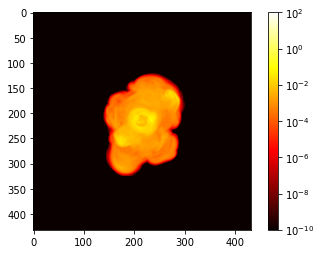

Delta: 4
432


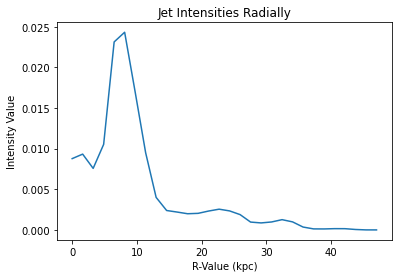

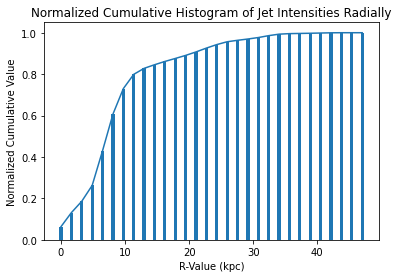

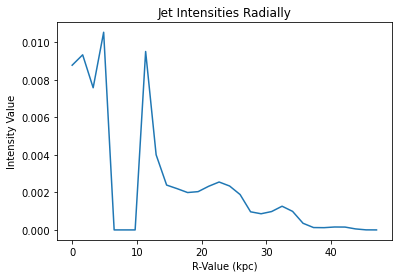


Total Radius (96%): 32.4078 kpc

Completed in 5 seconds
____________________________________________________________________________________________________

File Number 5/11

File Name: Jet Simulation Data/Group_L446_rc3_beta07/nu=30.0MHz/Group_L446_rc3_beta07_0131_nu=30.0_los=0.00_0.00_1.00_13.1Myr.fits.gz
Simulation Title: Simulation Group_L446_rc3_beta07 - 13.1 Myr - 30 MHz
Time index: 1.3100e+01 Myr
Pixel size: 1.2500e+21 cm
Center of fits image: (328, 328)
FITS Image Dimensions: 656x656 pixels 



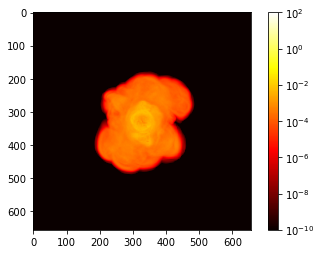

Delta: 5
656


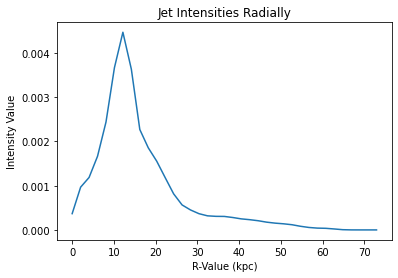

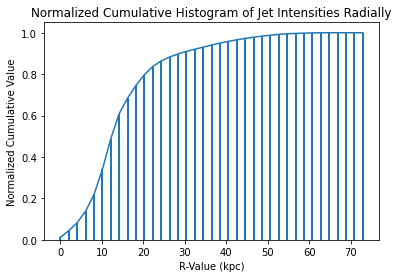

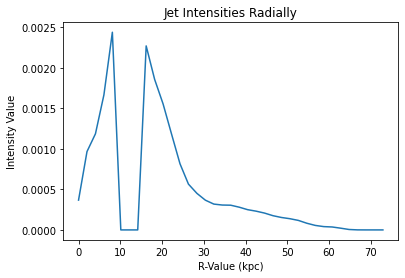


Total Radius (96%): 46.5862 kpc

Completed in 13 seconds
____________________________________________________________________________________________________

File Number 6/11

File Name: Jet Simulation Data/Group_L446_rc3_beta07/nu=30.0MHz/Group_L446_rc3_beta07_0132_nu=30.0_los=0.00_0.00_1.00_18.1Myr.fits.gz
Simulation Title: Simulation Group_L446_rc3_beta07 - 18.1 Myr - 30 MHz
Time index: 1.8093e+01 Myr
Pixel size: 1.2500e+21 cm
Center of fits image: (408, 408)
FITS Image Dimensions: 816x816 pixels 



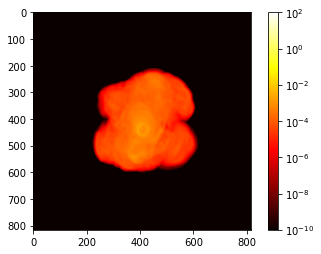

Delta: 7
816


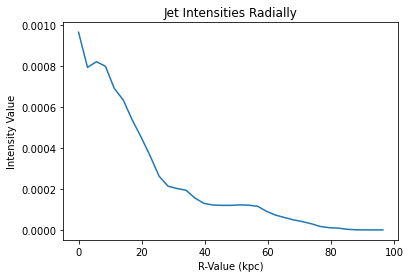

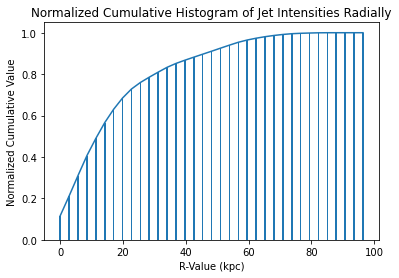

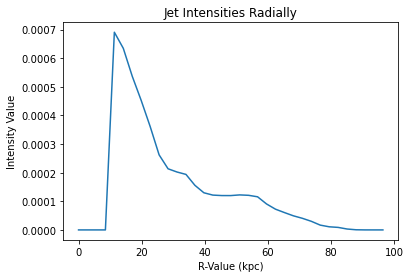


Total Radius (96%): 65.2207 kpc

Completed in 19 seconds
____________________________________________________________________________________________________

File Number 7/11

File Name: Jet Simulation Data/Group_L446_rc3_beta07/nu=30.0MHz/Group_L446_rc3_beta07_0135_nu=30.0_los=0.00_0.00_1.00_33.1Myr.fits.gz
Simulation Title: Simulation Group_L446_rc3_beta07 - 33.1 Myr - 30 MHz
Time index: 3.3064e+01 Myr
Pixel size: 1.2500e+21 cm
Center of fits image: (808, 808)
FITS Image Dimensions: 1616x1616 pixels 



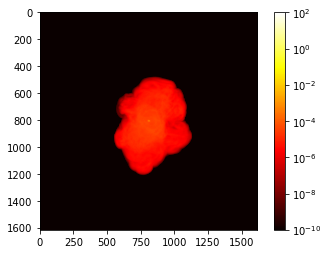

Delta: 11
1616


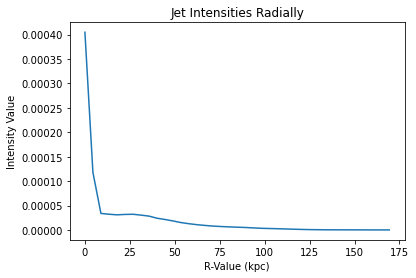

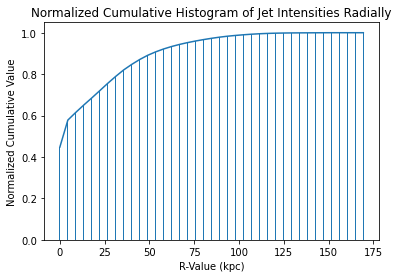

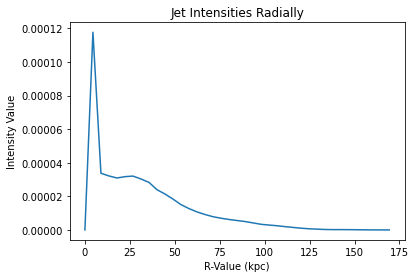


Total Radius (96%): 93.5775 kpc

Completed in 78 seconds
____________________________________________________________________________________________________

File Number 8/11

File Name: Jet Simulation Data/Group_L446_rc3_beta07/nu=30.0MHz/Group_L446_rc3_beta07_0141_nu=30.0_los=0.00_0.00_1.00_63.0Myr.fits.gz
Simulation Title: Simulation Group_L446_rc3_beta07 - 63.0 Myr - 30 MHz
Time index: 6.3011e+01 Myr
Pixel size: 1.2500e+21 cm
Center of fits image: (952, 952)
FITS Image Dimensions: 1904x1904 pixels 



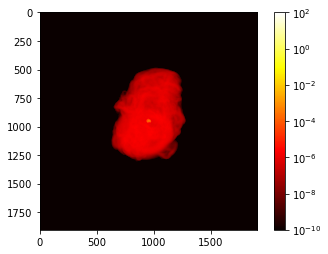

Delta: 20
1904


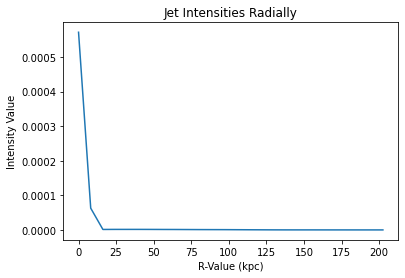

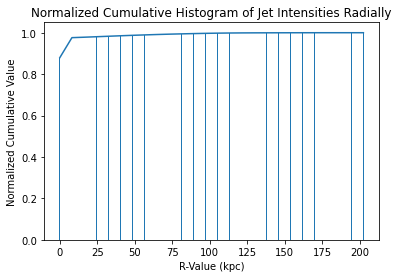

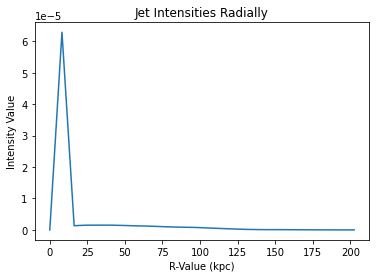


Total Radius (96%): 24.3058 kpc

Completed in 65 seconds
____________________________________________________________________________________________________

File Number 9/11

File Name: Jet Simulation Data/Group_L446_rc3_beta07/nu=30.0MHz/Group_L446_rc3_beta07_0154_nu=30.0_los=0.00_0.00_1.00_127.9Myr.fits.gz
Simulation Title: Simulation Group_L446_rc3_beta07 - 127.9 Myr - 30 MHz
Time index: 1.2790e+02 Myr
Pixel size: 1.2500e+21 cm
Center of fits image: (1528, 1528)
FITS Image Dimensions: 3056x3056 pixels 



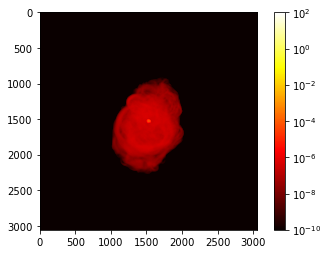

Delta: 42
3056


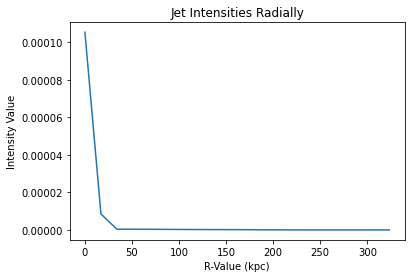

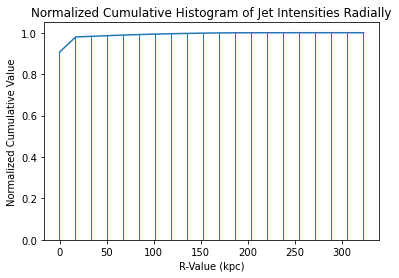

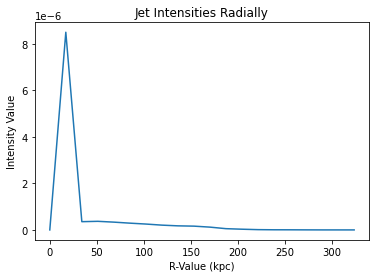


Total Radius (96%): 34.0282 kpc

Completed in 118 seconds
____________________________________________________________________________________________________

File Number 10/11

File Name: Jet Simulation Data/Group_L446_rc3_beta07/nu=30.0MHz/Group_L446_rc3_beta07_0180_nu=30.0_los=0.00_0.00_1.00_257.7Myr.fits.gz
Simulation Title: Simulation Group_L446_rc3_beta07 - 257.7 Myr - 30 MHz
Time index: 2.5769e+02 Myr
Pixel size: 1.2500e+21 cm
Center of fits image: (1608, 1608)
FITS Image Dimensions: 3216x3216 pixels 



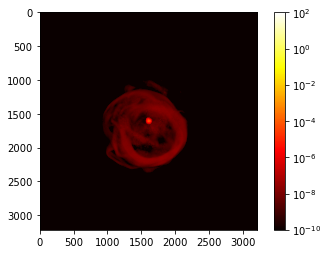

Delta: 107
3216


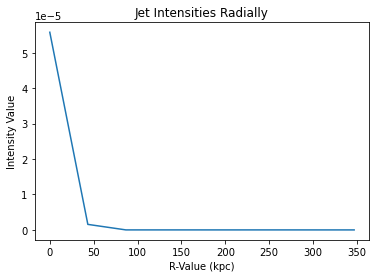

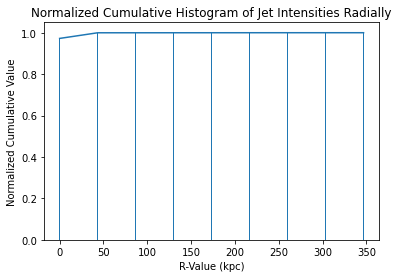

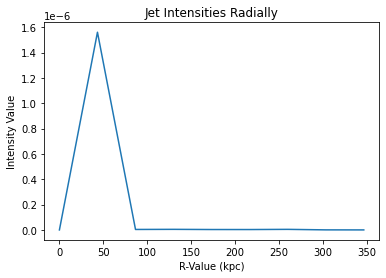


Total Radius (96%): 43.3454 kpc

Completed in 53 seconds
____________________________________________________________________________________________________

File Number 11/11

File Name: Jet Simulation Data/Group_L446_rc3_beta07/nu=30.0MHz/Group_L446_rc3_beta07_0223_nu=30.0_los=0.00_0.00_1.00_472.3Myr.fits.gz
Simulation Title: Simulation Group_L446_rc3_beta07 - 472.3 Myr - 30 MHz
Time index: 4.7233e+02 Myr
Pixel size: 1.2500e+21 cm
Center of fits image: (2024, 2024)
FITS Image Dimensions: 4048x4048 pixels 



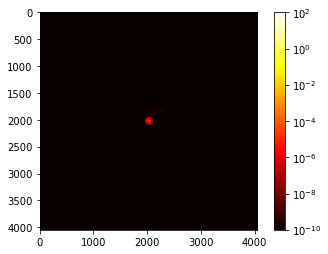

Delta: 344
4048


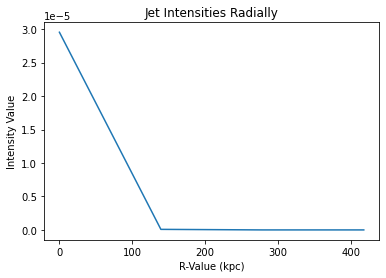

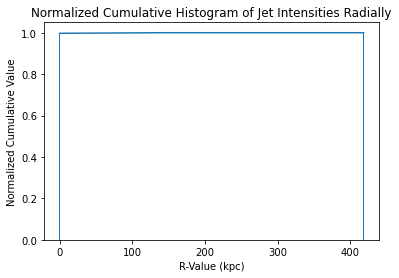

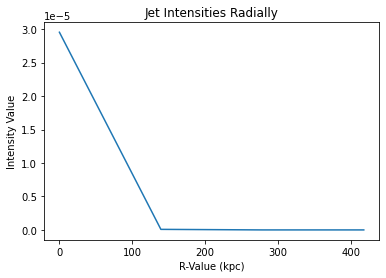


Total Radius (96%): 0.0 kpc

Completed in 45 seconds
____________________________________________________________________________________________________



In [3]:
#Main Calling Block of Code

print("\nJET RING DETERMINING PROGRAM:")
print("{}\n".format("_"*100))

path = '**/Group_L446_rc3_*nu=30.0*0.00_0.00_1.00*Myr.fits*'

# Determines if there are any files in device
total_files = len(glob.glob(path, recursive=True))

if total_files > 0:
    file_count = 0
    delta = 1
    for file in sorted(glob.glob(path, recursive=True)):

        file_count += 1

        try:
            print("File Number {}/{}\n".format(file_count, total_files))
            print("File Name: {}".format(file))
            
            image_data = fits.getdata(file, ext=0)
            fits_image_hdul = fits.open(file)

            #Displays FITS Image title, time index, and pixel size
            sim_title = fits_image_hdul[0].header['OBJECT']
            sim_time = fits_image_hdul[0].header['TIME']
            pixel = fits_image_hdul[0].header['CDELT1']
            print("Simulation Title: {}".format(sim_title))
            print("Time index: {}".format(sim_time))
            print("Pixel size: {}".format(pixel))
            pixel_size = float(pixel[:-3])
            
            center_x = round(float(fits_image_hdul[0].header['CRPIX1']))
            center_y = round(float(fits_image_hdul[0].header['CRPIX2']))
            center = (center_x, center_y)
            print("Center of fits image: {}".format(center))

            #Difines Data From FITS image and records image dimensions
            data =  fits_image_hdul[0].data
            length = len(data[0])
            width = len(data)
            print("FITS Image Dimensions: {}x{} pixels \n".format(length, width))

            for i in range(image_data.shape[0]):
                for j in range(image_data.shape[1]):
                    if image_data[i, j] == 0:
                        image_data[i, j] = 1e-12
            
            
            plt.figure()
            plt.imshow(image_data, cmap='hot', norm=col.LogNorm())
            plt.clim(10e-11, 1e2) 
            plt.colorbar() 
            plt.show()
            
            ring(data, pixel_size, center_x, center_y, delta)
            
            if delta > 4:
                delta = round(delta**1.25)
            else:
                delta += 1
            

            #Calls jet_width function
            #print("\nJET WIDTH DATA:")
            #print("{}\n".format("~"*50))
            #jet_width(data, width, pixel_size)

            print("{}\n".format("_"*100))

        except OSError:
            print("Error with file: {}".format(file))
            print("Empty or corrupt FITS file")
            
else:
    print("ERROR: Could not find any necessary files on your device")
    print("Program intakes files of the name: {}".format(path))